# Neural Network Predicting Success
Names: Arushi Agarwal

Member 1: Arushi Agarwal

Due: July 26th, 5:30pm

In [1]:
install.packages("keras")
install.packages("dplyr")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Case Study: Yelp Textmining NN

We will be creating a Neural Network with 4 hidden layers to predict the unemployment rate of a county given all other variables. 

## Data Preparation

Imported the data.

In [13]:
data2 <- read.csv("final_data.csv")
str(data2)

'data.frame':	2335 obs. of  46 variables:
 $ state                    : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ county                   : chr  "autauga" "baldwin" "barbour" "bibb" ...
 $ fips                     : int  1001 1003 1005 1007 1009 1011 1013 1015 1017 1019 ...
 $ pop                      : int  55504 212628 25270 22668 58013 10309 19825 114728 33713 25857 ...
 $ age_under_5              : num  5.7 5.7 5.5 5.7 6.1 5.8 5.9 5.7 6.1 4.5 ...
 $ age_over_65              : num  14.3 19 17.4 15.1 17.4 15.2 18.5 16.5 18.6 21 ...
 $ median_age               : num  37.8 42.6 39.7 39.8 40.9 40.8 40.7 39.1 43 46.1 ...
 $ black                    : num  9.55 4.77 24.02 11.03 0.79 ...
 $ native                   : num  0.15 0.41 0.1 0.18 0.18 0.52 0.03 0.18 0.14 0.24 ...
 $ asian                    : num  0.47 0.35 0.31 0 0.07 0.35 0.56 0.5 0.5 0.1 ...
 $ pac_isl                  : num  0.04 0 0 0 0 0 0 0 0 0 ...
 $ other_single_race        : num  0.65 0.39 1.87 0.02 0.37 0.0

### Generate training and testing datasets
**Reserved 2102 entries for training data, and the rest for testing. Left 10 entries for Validation from the testing data in case the RMSE of this model is less than that of the linear model. Also set seed to 420**


In [14]:
set.seed(420)
install.packages('dplyr')
library(dplyr)
library(tidyverse)
inp_data <- data2 %>% select(
        # VARS OF INTEREST
        hs_grad, some_college, bachelors,  # education stats

        # CONTROLS
        pop,  # population
        # demographics (races)
        black, native, asian, pac_isl, hispanic,
        white_not_hispanic, other_single_race, two_plus_races,
        # demographics (age)
        age_under_5, age_over_65, median_age,
        women_16_to_50_birth_rate,  # birth rate
        veterans,  # veteran % of pop
        computer,  # % w/ access to computer
        households, persons_per_household,  # pretty obvious
        # % of population that's uninsured & whatever
        uninsured, uninsured_age_under_6, uninsured_age_under_19, uninsured_age_over_74,
        civilian_labor_force  # size of labor force
)
inp_data$unemprate <- data2$unemployment_rate
inp_data <- inp_data %>% select(unemprate, everything())


n <- nrow(inp_data)
trainingindexes <- sample(n, 2102)
data2_train <- inp_data[trainingindexes, ]
data2_xtrain <- as.matrix(data2_train[, -1])
data2_ytrain <- as.matrix(data2_train[, 1])
data2_testing <- inp_data[-trainingindexes, ]
data2_validation <- data2_testing[1:10,]
data2_testing <- data2_testing[-c(1,2,3,4,5,6,7,8,9,10),]
data2_testx <- as.matrix(data2_testing[, -1])
data2_testy <- as.matrix(data2_testing[, 1])


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Reserved 10 validation entries

In [15]:
#more code to do this shown above 
data2_valx <- as.matrix(data2_validation[, -1])
data2_valy <- as.matrix(data2_validation[, 1])

## Building the NN
### **Define a Model with the following Architecture:**
  + 4 layers with 16,8,4,3 neurons respectively
  + Activation function in hidden layers is `relu`
  + Output layer has no activation function

In [16]:
library(dplyr)
library(keras)
p <- dim(data2_xtrain)[2] #number of input variables 
model <- keras_model_sequential() %>%
    layer_dense(units = 16, activation ="relu", input_shape = c(p)) %>%
    layer_dense(units = 8, activation="relu") %>%
    layer_dense(units = 4, activation="relu") %>%
    layer_dense(units = 3, activation="relu") %>%
    #output layer below
    layer_dense(units = 1)

### **Compile the Model**

In [17]:
set.seed(420)
model %>% compile(
  optimizer="rmsprop", #rmsprop means residual minimizing something :)
  loss="mse",
  metrics="accuracy"
)

### **Train the Model with the following parameters**
batch_size = 512

validation_split = .15

Epoch = 20

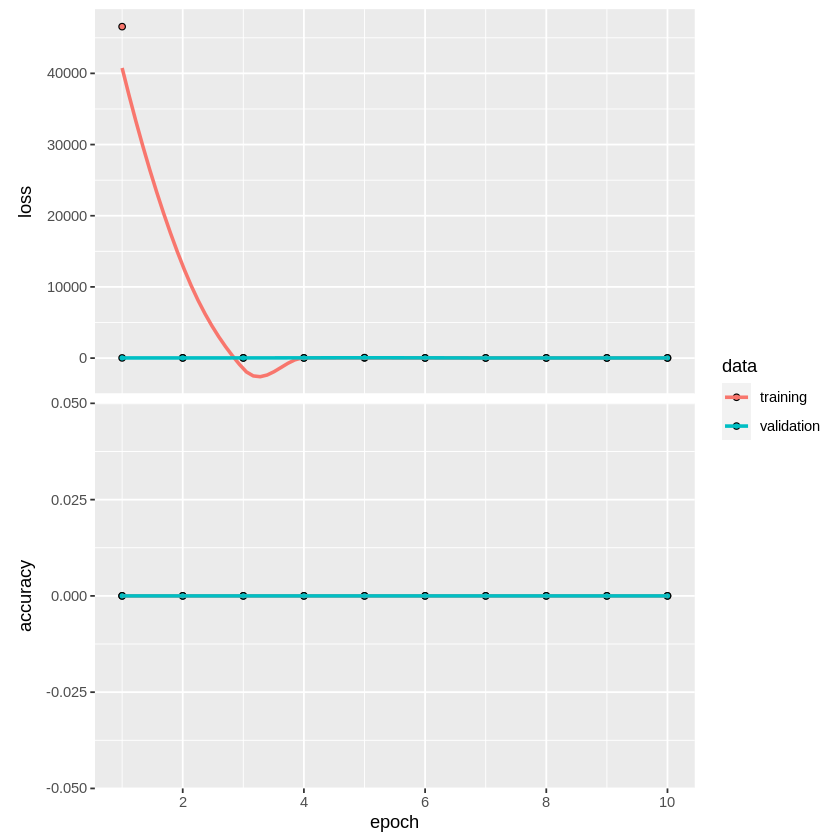

In [18]:
set.seed(420)
fit1 <- model %>% fit(
  data2_xtrain,
  data2_ytrain, 
  epochs = 10,
  batch_size = 50, 
  validation_split = 0.15
)
plot(fit1)

### **Assessing Performance** 
Loss = RMSE = 3.48


In [19]:
set.seed(420)
results <- model %>% evaluate(data2_testx, data2_testy)
sqrt(results)

loss accuracy 
4.506508 0.000000

## Conclusions  

Because the RMSE is greater than that of the linear model, we will be using that to make our predictions using the validation data. 